<a href="https://colab.research.google.com/github/Shwetarhonnikoppa/ShapeAI_Python_Machine_Learning/blob/main/Amazon_sales_report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import datetime as dt

In [ ]:
df = pd.read_csv("/content/Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21256,21255,406-2387387-8947547,04-17-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,L,Shipped,...,INR,696.00,GHAZIABAD,UTTAR PRADESH,201016.0,IN,False,NaN,NaN,NaN
21257,21256,403-8140724-2841155,04-17-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XS,Shipped,...,INR,399.00,MULAMTHURUTHY,KERALA,682314.0,IN,False,NaN,NaN,NaN
21258,21257,406-1819435-5357115,04-17-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,3XL,Shipped,...,INR,788.00,THIRUVANANTHAPURAM,KERALA,695014.0,IN,False,NaN,NaN,NaN
21259,21258,406-8977173-4635548,04-17-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,L,Cancelled,...,NaN,NaN,Ambala,HARYANA,133001.0,IN,False,NaN,NaN,NaN


In [ ]:
# Display the first few rows and the column names with data types
df.head()
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                    object
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object

In [ ]:
#  Data Cleaning
df['Date'] = df['Date'].apply(lambda x: re.sub(r'(\d{2})-(\d{2})-(\d{4})', r'\1-\2-\2', x) if re.match(r'\d{2}-\d{2}-\d{4}', x) else x)

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

In [ ]:
# Handle missing values
df['ship-postal-code'].fillna(0, inplace=True)
df['fulfilled-by'].fillna(df['fulfilled-by'].mode()[0], inplace=True)

In [ ]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

In [ ]:
# Display summary of missing values and cleaned data types
print("Missing Values After Cleaning:\n", df_cleaned.isnull().sum())
print("Data Types After Cleaning:\n", df_cleaned.dtypes)

Missing Values After Cleaning:
 index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               1283
Amount                 1283
ship-city                 8
ship-state                8
ship-postal-code          0
ship-country              9
B2B                       1
fulfilled-by              0
New                   21093
PendingS              21093
dtype: int64
Data Types After Cleaning:
 index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courie

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Generate summary statistics for numerical columns
summary_stats = df_cleaned.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
               index                           Date           Qty  \
count  21093.000000                          21093  21093.000000   
mean   10676.866259  2022-04-23 17:33:11.238799616      0.899445   
min        0.000000            2022-04-17 00:00:00      0.000000   
25%     5347.000000            2022-04-21 00:00:00      1.000000   
50%    10713.000000            2022-04-24 00:00:00      1.000000   
75%    15986.000000            2022-04-27 00:00:00      1.000000   
max    21259.000000            2022-04-30 00:00:00     15.000000   
std     6134.919883                            NaN      0.344398   

             Amount  ship-postal-code  New  PendingS  
count  19810.000000      21093.000000  0.0       0.0  
mean     620.740836     463517.599109  NaN       NaN  
min        0.000000          0.000000  NaN       NaN  
25%      432.000000     380015.000000  NaN       NaN  
50%      568.000000     500020.000000  NaN       NaN  
75%      759.000000     600029.00000

In [ ]:
# Generate frequency counts for categorical columns
frequency_counts = df_cleaned.select_dtypes(include=['object']).apply(pd.Series.value_counts)
print("Frequency Counts:\n", frequency_counts)

Frequency Counts:
                         Order ID  Status  Fulfilment  Sales Channel  \
171-0005999-3189913          1.0     NaN         NaN            NaN   
171-0012414-2446770          1.0     NaN         NaN            NaN   
171-0014460-2527559          1.0     NaN         NaN            NaN   
171-0022483-5361108          1.0     NaN         NaN            NaN   
171-0024891-4859557          1.0     NaN         NaN            NaN   
...                          ...     ...         ...            ...   
Punjab/Mohali/Zirakpur       NaN     NaN         NaN            NaN   
W                            NaN     NaN         NaN            NaN   
False                        NaN     NaN         NaN            NaN   
True                         NaN     NaN         NaN            NaN   
Easy Ship                    NaN     NaN         NaN            NaN   

                        ship-service-level  Category  Size  Courier Status  \
171-0005999-3189913                    NaN       N

In [ ]:
#  Sales Overview
# Aggregate sales data by month, quarter, and year
df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')
df_cleaned['Quarter'] = df_cleaned['Date'].dt.to_period('Q')
df_cleaned['Year'] = df_cleaned['Date'].dt.to_period('A')

monthly_sales = df_cleaned.groupby('Month')['Amount'].sum()
quarterly_sales = df_cleaned.groupby('Quarter')['Amount'].sum()
yearly_sales = df_cleaned.groupby('Year')['Amount'].sum()

<ipython-input-12-f96115cc81f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Date'].dt.to_period('M')
<ipython-input-12-f96115cc81f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Quarter'] = df_cleaned['Date'].dt.to_period('Q')
<ipython-input-12-f96115cc81f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


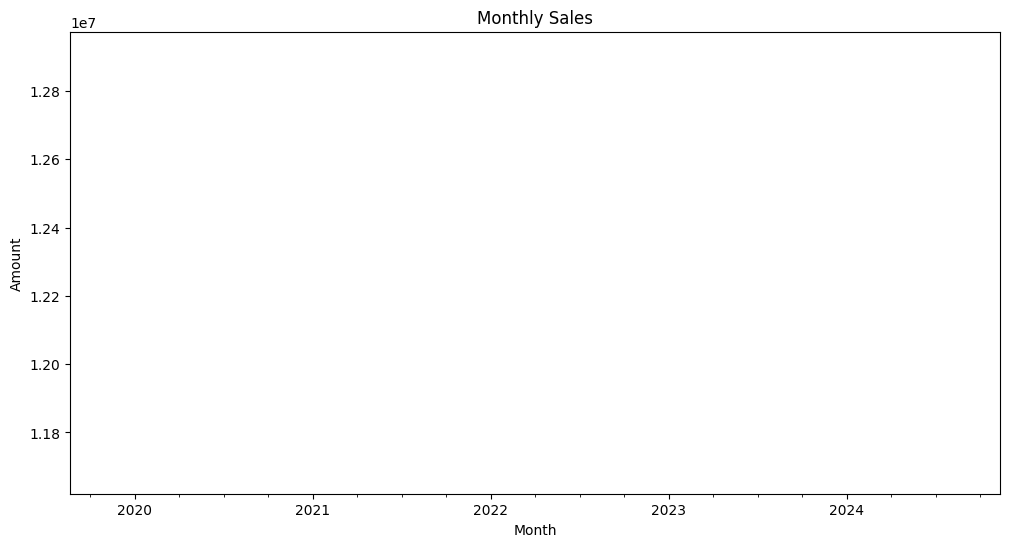

In [ ]:
# Plot sales data
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', title='Monthly Sales', ylabel='Amount', xlabel='Month')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


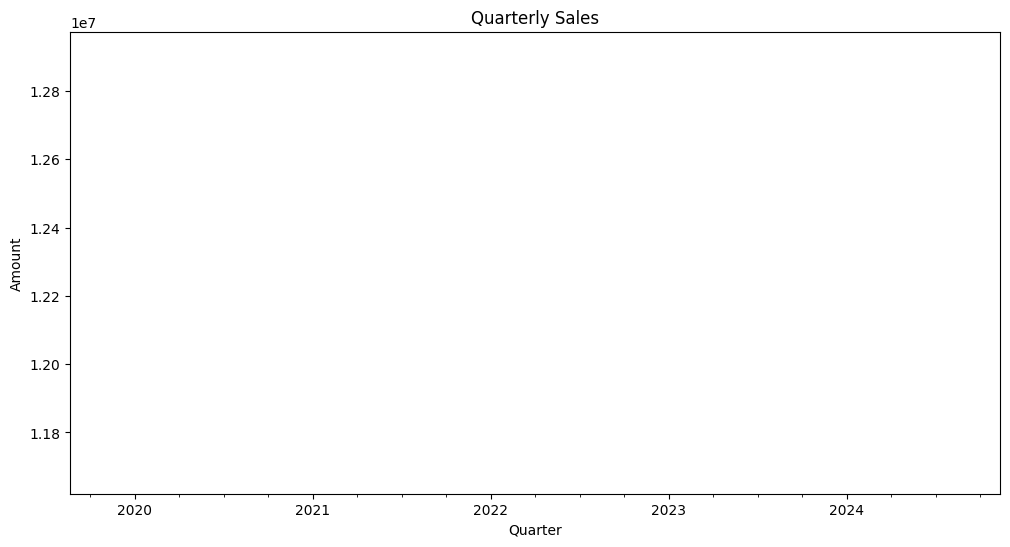

In [ ]:
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='line', title='Quarterly Sales', ylabel='Amount', xlabel='Quarter')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


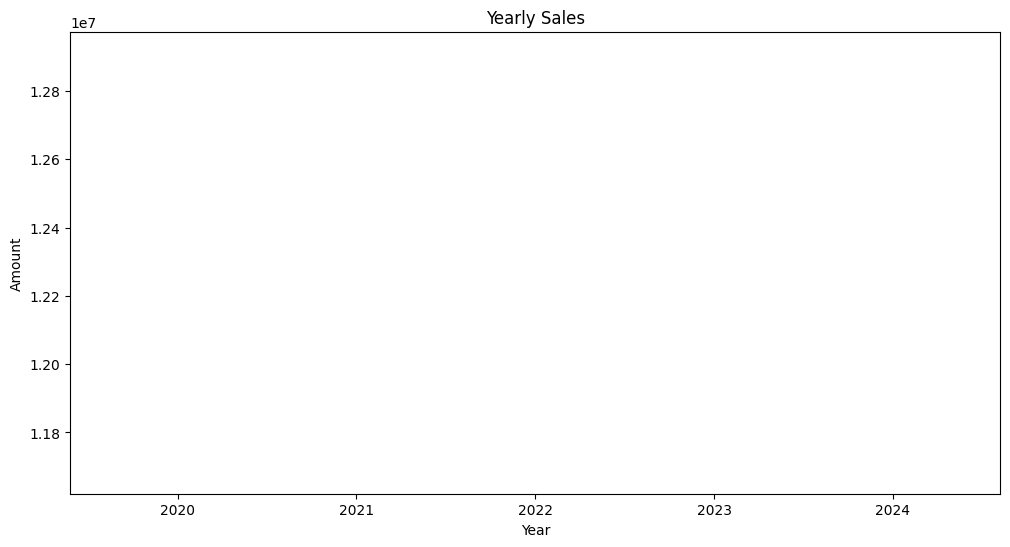

In [ ]:
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='line', title='Yearly Sales', ylabel='Amount', xlabel='Year')
plt.show()

In [ ]:
# Product Analysis
# Analyze the distribution of sales across different product categories, sizes, and quantities
category_sales = df_cleaned.groupby('Category')['Amount'].sum()
size_sales = df_cleaned.groupby('Size')['Amount'].sum()
quantity_sales = df_cleaned['Qty'].value_counts()

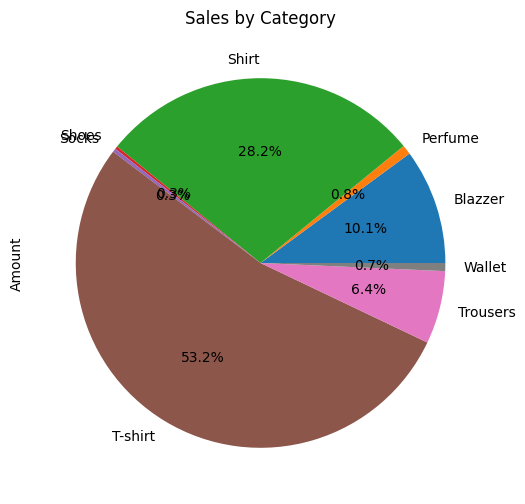

In [ ]:
# Plot category distribution
plt.figure(figsize=(12, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Category')
plt.show()

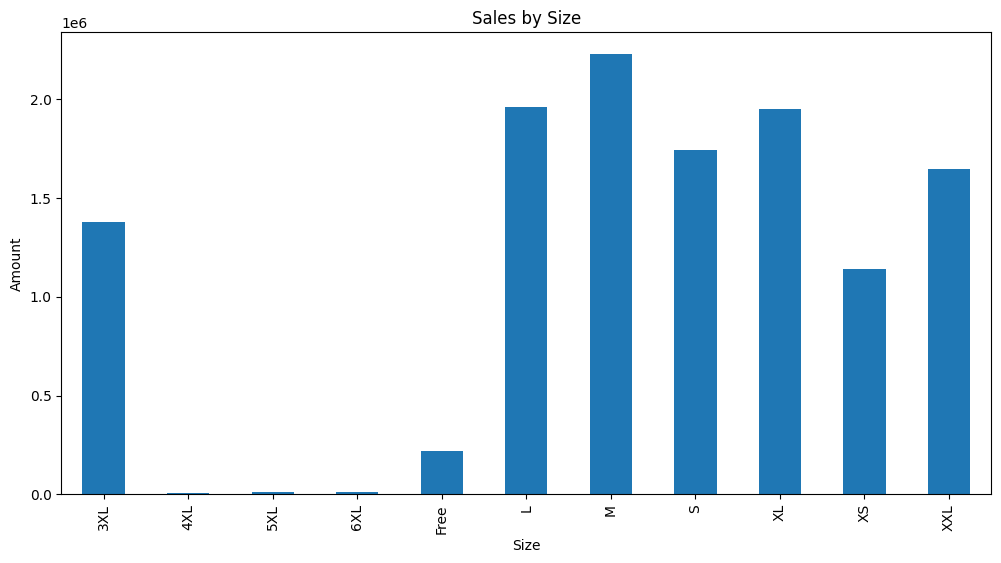

In [ ]:
# Plot size distribution
plt.figure(figsize=(12, 6))
size_sales.plot(kind='bar', title='Sales by Size', ylabel='Amount', xlabel='Size')
plt.show()

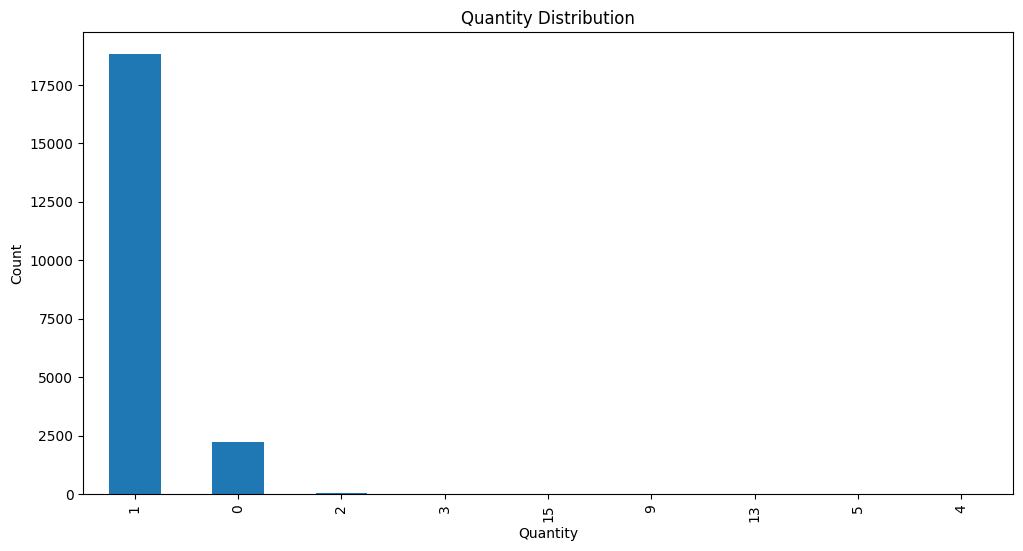

In [ ]:
# Plot quantity distribution
plt.figure(figsize=(12, 6))
quantity_sales.plot(kind='bar', title='Quantity Distribution', ylabel='Count', xlabel='Quantity')
plt.show()

In [ ]:
# Fulfillment Analysis
# Evaluate the performance of different fulfillment methods
fulfillment_performance = df_cleaned.groupby('Fulfilment')['Amount'].sum()
delivery_times = df_cleaned.groupby('Fulfilment')['Date'].apply(lambda x: (x.max() - x.min()).days)

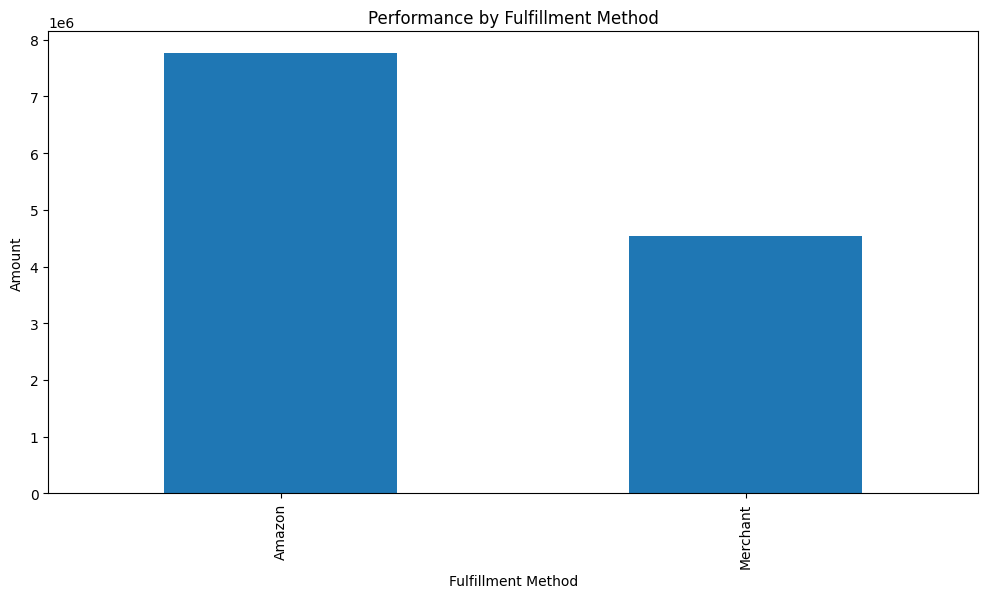

In [ ]:
# Plot fulfillment performance
plt.figure(figsize=(12, 6))
fulfillment_performance.plot(kind='bar', title='Performance by Fulfillment Method', ylabel='Amount', xlabel='Fulfillment Method')
plt.show()

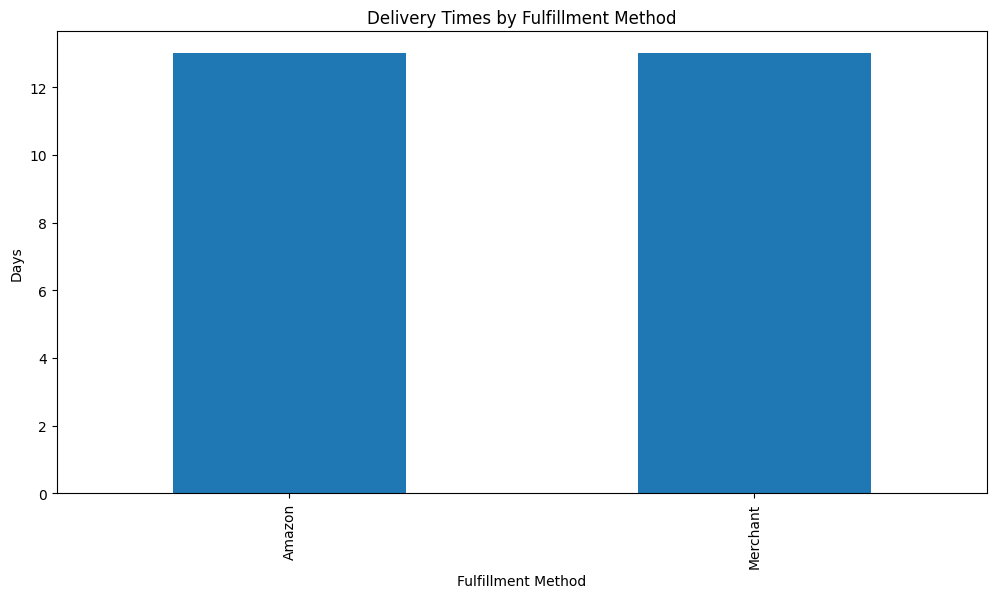

In [ ]:
# Plot delivery times
plt.figure(figsize=(12, 6))
delivery_times.plot(kind='bar', title='Delivery Times by Fulfillment Method', ylabel='Days', xlabel='Fulfillment Method')
plt.show()

In [ ]:
#  Customer Segmentation
# Segment customers based on their buying behavior
customer_segments = df_cleaned.groupby('Order ID').agg({
    'Amount': 'sum',
    'Qty': 'sum',
    'Date': 'count'
}).rename(columns={'Date': 'Order Count'})

In [ ]:
# Cluster analysis for segmentation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
customer_segments['Cluster'] = kmeans.fit_predict(customer_segments)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


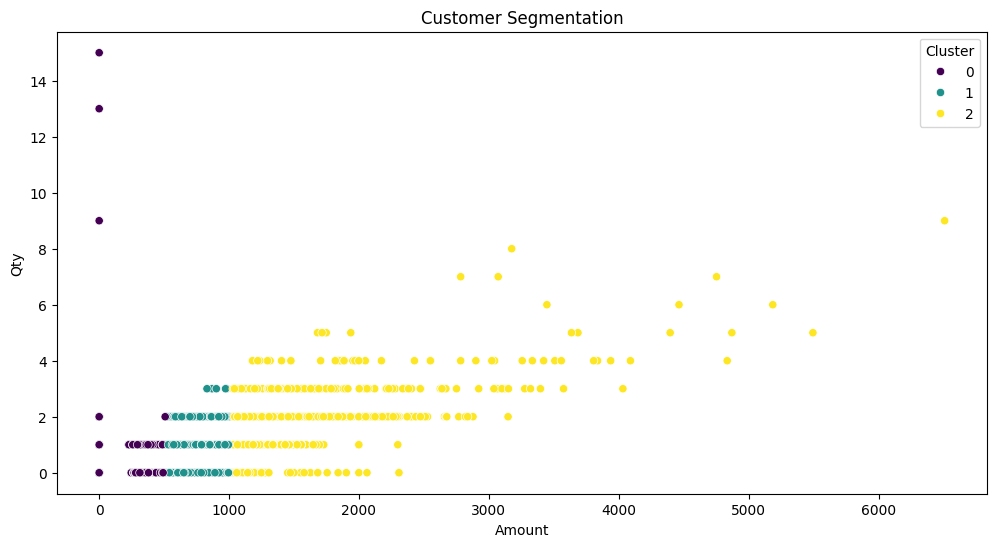

In [ ]:
# Plot customer segments
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_segments, x='Amount', y='Qty', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()

In [ ]:
# Geographical Analysis
# Map sales data to geographical locations
state_sales = df_cleaned.groupby('ship-state')['Amount'].sum()

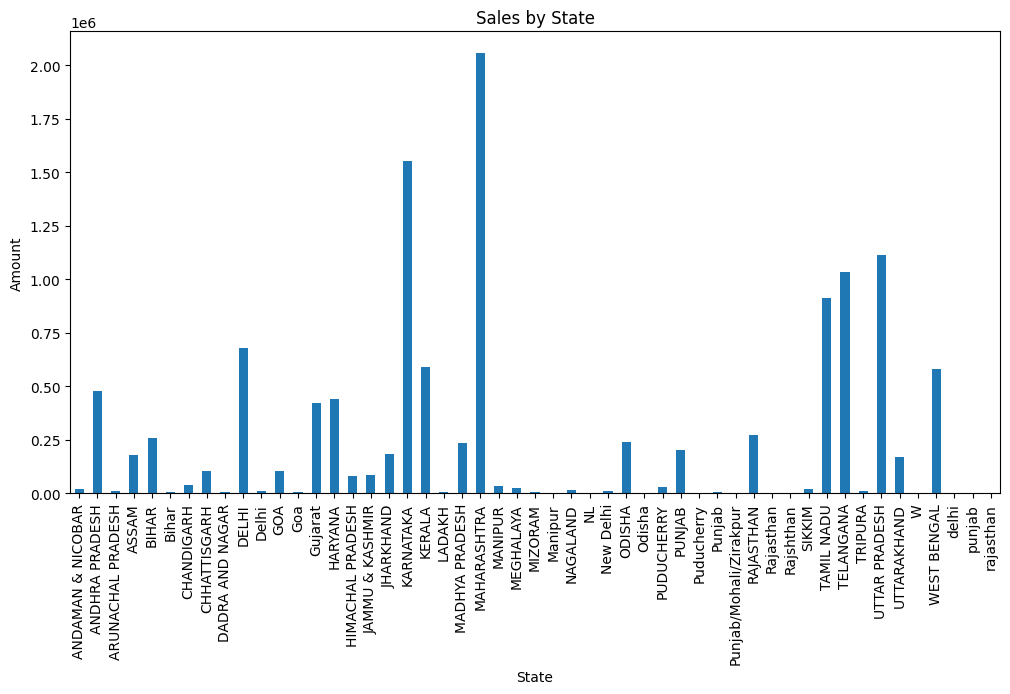

In [ ]:
# Plot geographical sales distribution
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', title='Sales by State', ylabel='Amount', xlabel='State')
plt.show()